## Data

In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
#os.chdir("/Users/ippy/Desktop")
data = pd.read_excel('@Ninja_user_tweets.xlsx')

In [2]:
data.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions
0,1253875441431203845,Duo quads w/ @cloakzy and hit this weird clip ...,Ninja,Ninja,2020-04-25T02:36:15.000Z,Sat Apr 25 02:36:15 +0000 2020,3828,177,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,Video,https://video.twimg.com/ext_tw_video/125387531...,0,0,1
1,1253870867072921607,RT @cloakzy : Its been awhile. Gunfight and cl...,Ninja,Ninja,2020-04-25T02:18:05.000Z,Sat Apr 25 02:18:05 +0000 2020,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,NaN,1,0,1
2,1253860998219431944,RT @MrBeastYT : Here is the final bracket for ...,Ninja,Ninja,2020-04-25T01:38:52.000Z,Sat Apr 25 01:38:52 +0000 2020,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,Photo,https://pbs.twimg.com/media/EWaWWKnXQAQggJ6.jp...,0,0,0
3,1253852584802160641,RT @SypherPK : How to handle stream snipers.. ...,Ninja,Ninja,2020-04-25T01:05:26.000Z,Sat Apr 25 01:05:26 +0000 2020,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,Video,https://video.twimg.com/ext_tw_video/125384626...,0,0,1
4,1253839699732504577,"Familiar, and Fire! Also, great job raising 17...",Ninja,Ninja,2020-04-25T00:14:14.000Z,Sat Apr 25 00:14:14 +0000 2020,3650,82,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,NaN,1,0,0


In [3]:
data.tail()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions
3186,1125859104235429888,Happy birthday to the guy who makes videos you...,Ninja,Ninja,2019-05-07T20:25:02.000Z,Tue May 07 20:25:02 +0000 2019,28159,692,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,NaN,0,0,1
3187,1125839830062116869,RT @DrLupo : @Ninja @IamTrevorMay while everyo...,Ninja,Ninja,2019-05-07T19:08:27.000Z,Tue May 07 19:08:27 +0000 2019,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,NaN,NaN,1,0,2
3188,1125835524764254210,wow @IamTrevorMay,Ninja,Ninja,2019-05-07T18:51:20.000Z,Tue May 07 18:51:20 +0000 2019,3839,75,und,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,NaN,0,0,1
3189,1125814254156775424,RT @FortniteGame : The Future is Bright.\n5.9....,Ninja,Ninja,2019-05-07T17:26:49.000Z,Tue May 07 17:26:49 +0000 2019,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,Photo,https://pbs.twimg.com/media/D5-C_e6XkAACt4_.jpg,0,1,0
3190,1125809575444324353,New video is up! https://t.co/2YFQPf1T1F via ...,Ninja,Ninja,2019-05-07T17:08:13.000Z,Tue May 07 17:08:13 +0000 2019,1426,68,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,1,0,1


DATASET FEATURES

Tweet ID: Twitter's unique identification number for the tweet

Text: The text contents of the tweet/the tweet itself

Name: Real name of the user

Screen name: Twitter handle (@screenname)

UTC: Time tweet was created based off coordinated universal time

Created At: Date and time the tweet was posted

Favorite: Number of favorites on the tweet

Retweets: Number of retweets of the tweet

Language: Language of the tweet

Client: Platform that the tweet was posted from (iPhone, Android, etc.)

Tweet Type: Tweet, reply, or retweet (we will only use tweet)

Media Type: If a photo/video/website link was attached to the tweet, it will be mentioned here

Media URLs: URL to the posted media

URLs: Number of URLs posted with the tweet

Hashtags: Number of hashtags posted with the tweet

Mentions: Number of other users mentioned in the tweet

## Exploratory Data Analysis

In [4]:
data.describe()

,Tweet Id,Favorites,Retweets,URLs,Hashtags,Mentions
count,3.191000e+03,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000
mean,1.188289e+18,7614.843623,351.550924,0.250705,0.109057,0.897211
std,3.566707e+16,16849.915784,1405.489972,0.454664,0.428619,1.146931
min,1.125810e+18,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.159290e+18,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.187460e+18,2051.000000,38.000000,0.000000,0.000000,1.000000
75%,1.217619e+18,8252.000000,211.000000,0.000000,0.000000,1.000000
max,1.253875e+18,380057.000000,31137.000000,5.000000,8.000000,17.000000


We have a total of 3191 tweets to work with, starting from mid-2019. The tweets may be replies or retweets which means less engagement, and some may be sponsored posts/advertisements, which could also mean less engagement.

The max number of favorites and retweets is much, much more than the 75th percentile, suggesting that this data is heavily skewed to the right. It may benefit us to perform some sort of scaling, or to select smaller chunks in the dataset instead of the entire thing when training.

## Pre-"extraneous tweet removal" plots

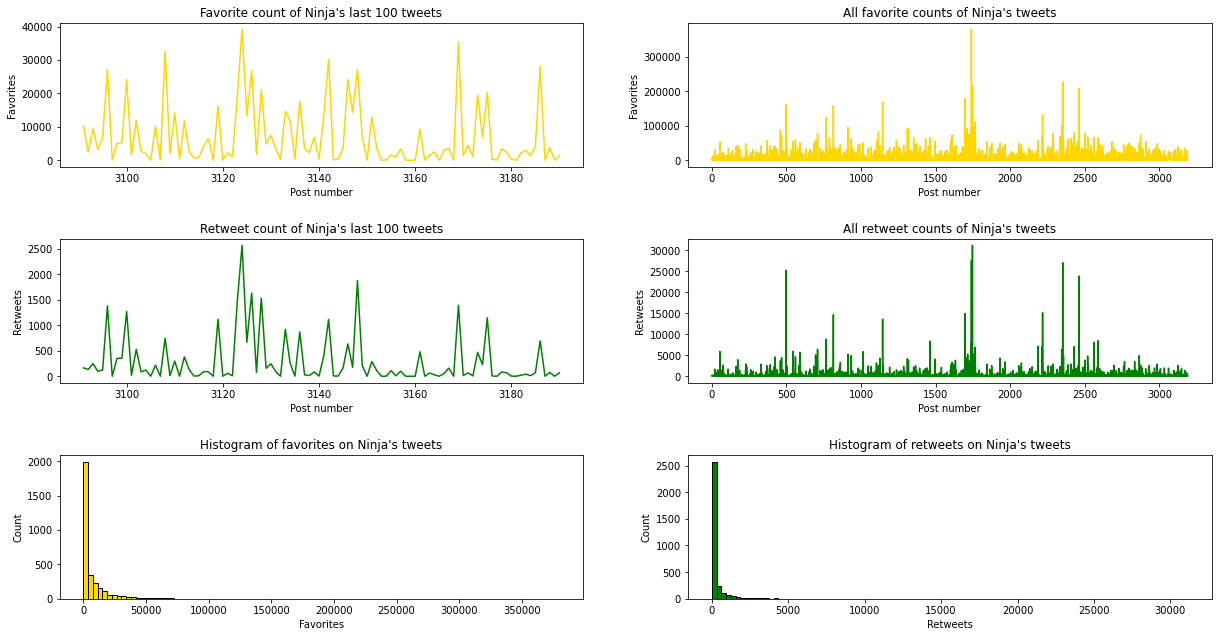

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(16,8))

axs[0, 0].plot(data['Favorites'][-100:], color='gold')
axs[0, 0].set_title("Favorite count of Ninja's last 100 tweets")
axs[0, 0].set_xlabel('Post number')
axs[0, 0].set_ylabel('Favorites')

axs[0, 1].plot(data['Favorites'], color='gold')
axs[0, 1].set_title("All favorite counts of Ninja's tweets")
axs[0, 1].set_xlabel('Post number')
axs[0, 1].set_ylabel('Favorites')

axs[1, 0].plot(data['Retweets'][-100:], color='green')
axs[1, 0].set_title("Retweet count of Ninja's last 100 tweets")
axs[1, 0].set_xlabel('Post number')
axs[1, 0].set_ylabel('Retweets')

axs[1, 1].plot(data['Retweets'], color='green')
axs[1, 1].set_title("All retweet counts of Ninja's tweets")
axs[1, 1].set_xlabel('Post number')
axs[1, 1].set_ylabel('Retweets')

bins = 100
axs[2, 0].hist(data['Favorites'], bins, facecolor='gold', edgecolor='black')
axs[2, 0].set_title("Histogram of favorites on Ninja's tweets")
axs[2, 0].set_xlabel("Favorites")
axs[2, 0].set_ylabel("Count")

axs[2, 1].hist(data['Retweets'], bins, facecolor='green', edgecolor='black')
axs[2, 1].set_title("Histogram of retweets on Ninja's tweets")
axs[2, 1].set_xlabel("Retweets")
axs[2, 1].set_ylabel("Count")

fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0,
                    hspace=0.5, wspace=0.2)

As we see here, the overall trend appears to be very random, with a few, very large spikes in favorites and retweets.

These histograms prove the extreme skewed-ness of the data, and require that we must preprocess it in some way to obtain meaningful results from our model.

Firstly, we can remove tweets that are replies and retweets. Replies aren't made visible to all followers, so natural they receive less engagement. Retweets are made visible to all followers, but perform differently than regular tweets because they weren't posted by the user we're analyzing.

## Post-"extraneous tweet removal" plots

In [6]:
data = data[data['Tweet Type'] == 'Tweet']
data[['Text','Tweet Type']] # all tweets are users from @Ninja, no retweets, no replies
data.shape

(1379, 16)

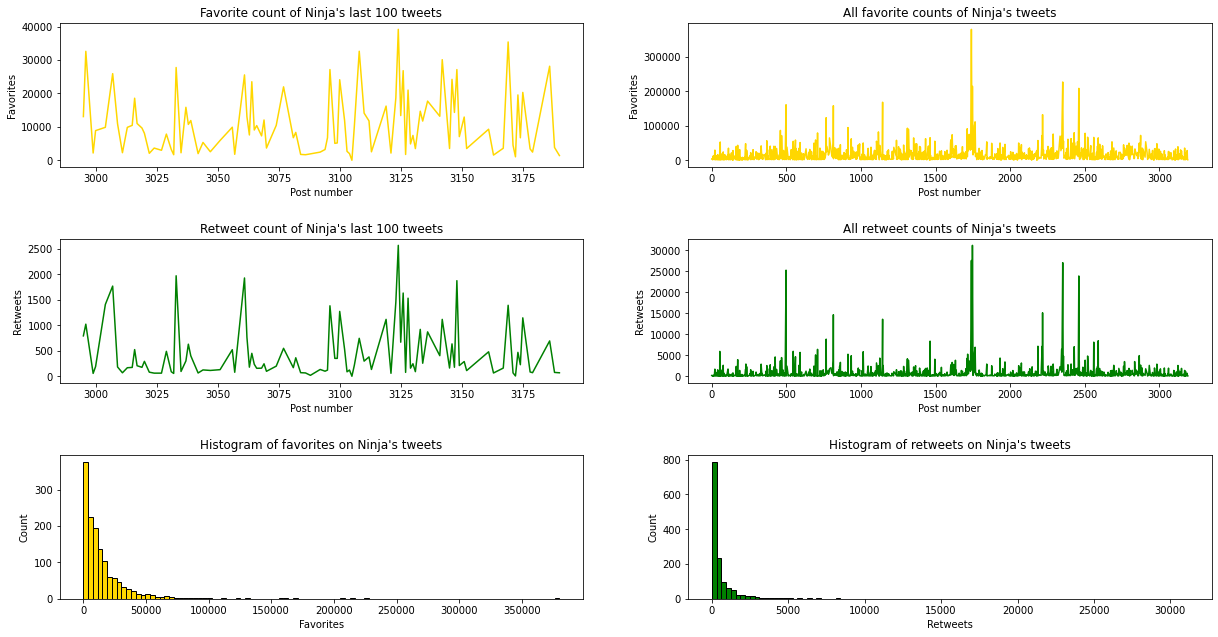

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(16,8))

axs[0, 0].plot(data['Favorites'][-100:], color='gold')
axs[0, 0].set_title("Favorite count of Ninja's last 100 tweets")
axs[0, 0].set_xlabel('Post number')
axs[0, 0].set_ylabel('Favorites')

axs[0, 1].plot(data['Favorites'], color='gold')
axs[0, 1].set_title("All favorite counts of Ninja's tweets")
axs[0, 1].set_xlabel('Post number')
axs[0, 1].set_ylabel('Favorites')

axs[1, 0].plot(data['Retweets'][-100:], color='green')
axs[1, 0].set_title("Retweet count of Ninja's last 100 tweets")
axs[1, 0].set_xlabel('Post number')
axs[1, 0].set_ylabel('Retweets')

axs[1, 1].plot(data['Retweets'], color='green')
axs[1, 1].set_title("All retweet counts of Ninja's tweets")
axs[1, 1].set_xlabel('Post number')
axs[1, 1].set_ylabel('Retweets')

bins = 100
axs[2, 0].hist(data['Favorites'], bins, facecolor='gold', edgecolor='black')
axs[2, 0].set_title("Histogram of favorites on Ninja's tweets")
axs[2, 0].set_xlabel("Favorites")
axs[2, 0].set_ylabel("Count")

axs[2, 1].hist(data['Retweets'], bins, facecolor='green', edgecolor='black')
axs[2, 1].set_title("Histogram of retweets on Ninja's tweets")
axs[2, 1].set_xlabel("Retweets")
axs[2, 1].set_ylabel("Count")

fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0,
                    hspace=0.5, wspace=0.2)

After removing these unneccessary tweets, we still see a lot of variation, but it is less extreme across all plots.

Here we print out the text head and tail before running it through our "text cleaner" just to test the affects it has on our dataset. 

# Models

### NLP - TextBlob

The primary model we use is a form a natural language processor (NLP). We are using the textblob library as we deemed the NLTK library slightly too 'heavy' and tedious for our project. The textblob library is based off of NLTK as well as Pattern. TextBlob provides easy access to functions that provide sentiment analysis as well as noun phrase extraction. Furthermore, TextBlob is also very beginner friendly and easy-to-use. So far in our project we apply TextBlob functions that return subjectivity and polarity. The polarity function returns a float value between -1 and 1 where 1 is a positive statemnt and -1 is a negative statement. The subjectivity function also returns a float value between 0 and 1 depending on how subjective or objective the statement is. The higher the subjectivity value the more likely the statement is to be an opinion. 

In addition to applying TextBlob, we also apply WordCloud to study which words are the most commonly tweeted and how this would affect engagement. There may be buzzwords on twitter that can generate more engagement than others, and this is something we must look into.  

In [8]:
data[['Text']].head()

,Text
0,Duo quads w/ @cloakzy and hit this weird clip ...
4,"Familiar, and Fire! Also, great job raising 17..."
5,I remember this like it was yesterday!\n\nChec...
6,Live for the day\n\nhttps://t.co/lvn9KBjEYq
7,Happy birthday to one of my best friends @Jord...


In [9]:
data[['Text']].tail()

,Text
3178,https://t.co/grTQt2ZhSQ https://t.co/N0TwomPLL7
3179,Hopping into squads immediately with @DrLupo @...
3186,Happy birthday to the guy who makes videos you...
3188,wow @IamTrevorMay
3190,New video is up! https://t.co/2YFQPf1T1F via ...


We are using a function to remove parts of the tweet we deem unnecessary. These include @mentions, hastags, retweets tags, and hyperlinks. 

In [10]:
# Create a function to clean the tweets
import re
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\n', '', text) # Removing newline
 
 return text

In [11]:
# Clean the tweets
data['Text'] = data['Text'].apply(cleanTxt)

# Show the cleaned tweets
data['Text']

0              Duo quads w/  and hit this weird clip LOL 
4       Familiar, and Fire! Also, great job raising 17...
5       I remember this like it was yesterday!Check ou...
6                                        Live for the day
7       Happy birthday to one of my best friends _Fish...
                              ...                        
3178                                                     
3179    Hopping into squads immediately with  _Ruski a...
3186    Happy birthday to the guy who makes videos you...
3188                                                 wow 
3190                              New video is up!   via 
Name: Text, Length: 1379, dtype: object

To measure tweet sentiment we apply two TextBlob functions. 

In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


To make it easier to analyze the relationship between tweets and sentiment, we add columns for subjectivity and polarity into our dataset. 

In [13]:
# Create two new columns 'Subjectivity' & 'Polarity'
data['Subjectivity'] = data['Text'].apply(getSubjectivity)
data['Polarity'] = data['Text'].apply(getPolarity)


Now a vizualisation of the change. 

In [14]:
data[['Text','Subjectivity','Polarity']]

,Text,Subjectivity,Polarity
0,Duo quads w/ and hit this weird clip LOL,0.850000,0.150000
4,"Familiar, and Fire! Also, great job raising 17...",0.625000,0.634375
5,I remember this like it was yesterday!Check ou...,0.000000,0.000000
6,Live for the day,0.500000,0.136364
7,Happy birthday to one of my best friends _Fish...,0.760000,0.640000
...,...,...,...
3178,,0.000000,0.000000
3179,Hopping into squads immediately with _Ruski a...,0.000000,0.000000
3186,Happy birthday to the guy who makes videos you...,1.000000,1.000000
3188,wow,1.000000,0.100000


Once subjectivity and polarity have been implemented, it would be helpful to implement a function that marks tweets as either positive, negative, or neutral. 

In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
#add an analysis colum
data['Analysis'] = data['Polarity'].apply(getAnalysis)
# Show the dataframe
data[['Text','Subjectivity','Polarity','Analysis']]

,Text,Subjectivity,Polarity,Analysis
0,Duo quads w/ and hit this weird clip LOL,0.850000,0.150000,Positive
4,"Familiar, and Fire! Also, great job raising 17...",0.625000,0.634375,Positive
5,I remember this like it was yesterday!Check ou...,0.000000,0.000000,Neutral
6,Live for the day,0.500000,0.136364,Positive
7,Happy birthday to one of my best friends _Fish...,0.760000,0.640000,Positive
...,...,...,...,...
3178,,0.000000,0.000000,Neutral
3179,Hopping into squads immediately with _Ruski a...,0.000000,0.000000,Neutral
3186,Happy birthday to the guy who makes videos you...,1.000000,1.000000,Positive
3188,wow,1.000000,0.100000,Positive


At this point we can start attempting to analyze the content of the tweets and see what we can uncover. We will first add a word cloud visualization to see which words are most positive. Furthermore we will also list the most positive and the most negative tweets. 

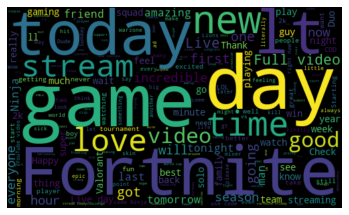

In [16]:
# word cloud visualization
allWords = ' '.join([twts for twts in data['Text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
# Printing positive tweets
sortedDF = data.sort_values(by=['Polarity'], ascending=False) #Sort the tweets
sortedDF = sortedDF.reset_index(drop=True) #Reorder indices
print('Printing positive tweets:\n')
for i in range(1,11):
    print(str(i) + ". " + sortedDF['Text'][i])
    print("Polarity = " + str(sortedDF['Polarity'][i]))
    print("\n")

Printing positive tweets:

1. Leave it up to the lions to make the Bears offense look like the best in the league.
Polarity = 1.0


2. 64 points w/ ma boy 2k_ we Didn't qualify but if you guys saw our start... LOL 15 points 4 games in and then we turned it up. I will be at the World cup in NYC no matter what though! And thank you  for the opportunity.
Polarity = 1.0


3. One of the best gifts I’ve ever gotten. Courtesy of 10 and  
Polarity = 1.0


4. This is the greatest thing ever 
Polarity = 1.0


5. Demon slayer is going to become the greatest Anime of all time change my mind.  
Polarity = 1.0


6. I will be the best minecrafter off all time and it wont even be close. Give me time. 
Polarity = 1.0


7. Congrats to the best solo player in the world, and it's not even close  
Polarity = 1.0


8. Streaming all day :D
Polarity = 1.0


9. That might be the best touchdown Catch of the season
Polarity = 1.0


10. Streaming some Fortnite :D My one goal... Not to die because of the turbo bui

In [18]:
# Printing negative tweets  
sortedDF = data.sort_values(by=['Polarity']) #Sort the tweets
sortedDF = sortedDF.reset_index(drop=True) #Reorder indices
print('Printing negative tweets:\n')
for i in range(1,11):
    print(str(i) + ". " + sortedDF['Text'][i])
    print("Polarity = " + str(sortedDF['Polarity'][i]))
    print("\n")

Printing negative tweets:

1. I just filmed what could be the weirdest thing I have ever done and it will be insanely memeable.
Polarity = -1.0


2. Tag the worst gamer in your squad  
Polarity = -1.0


3. I’ll say it... I’ll say it!! “Say it” .... Salty springs is the worst POI ever 🥴
Polarity = -1.0


4. DON'T GET IT TWISTED!!! I SAID GET FOOD FOR ONE ANOTHER! &lt;3 
Polarity = -1.0


5. MY AIM IS TOO NASTY! FT. SYPHERPK, TIMTHETATMAN &amp; COURAGEJDFull video here: ▶️  
Polarity = -1.0


6. Hate when this happens 😔 
Polarity = -0.8


7. I hate confrontation
Polarity = -0.8


8. Missed qualifying by 2 points :(
Polarity = -0.75


9. Merry Christmas :( 
Polarity = -0.75


10. That didn’t help at all :(  
Polarity = -0.75




The following is a plot to see if there is a trend between subjectivity and polarity:

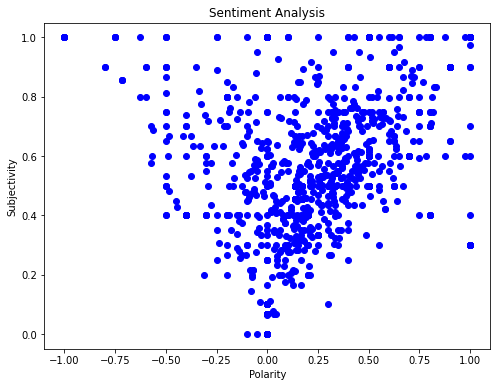

In [19]:
data = data.reset_index(drop=True) #reorder indices
plt.figure(figsize=(8,6)) 
for i in range(0, data.shape[0]):
  plt.scatter(data["Polarity"][i], data["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

Furthermore, we wanted to see the overall values of positive vs. negative as well as neutral tweets.

In [20]:
data['Analysis'].value_counts()

Positive    732
Neutral     455
Negative    192
Name: Analysis, dtype: int64

A visualition of the data follows: 

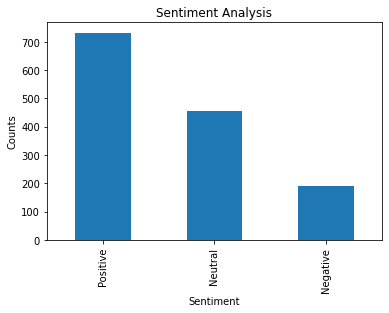

In [21]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

### Linear Regression 

We will be using linear regression to analyze patterns between these continuous features, and the engagement (retweets and favorites).

#### Polarity vs. engagement

Here we use a linear regression between polarity and retweet count. We use this to predict the number of retweets we get on a polarity score on an input tweet.

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
X=data['Polarity'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

2.727373397948263e-05


This is super low, suggesting that tweet polarity isn't a good predictor of engagement. Let's try with favorites now.

In [23]:
X=data['Polarity'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

0.001159248055018658


Still very low, but an improvment nonetheless. Lets look at sentiment instead.

#### Subjectivity vs. engagement

In [24]:
X=data['Subjectivity'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

-0.0012430111550842948


In [25]:
X=data['Subjectivity'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

0.00039148757861018346


Again, almost no predictive power.

#### Hashtags vs. engagment

Would including hashtags affect engagement?

In [26]:
X=data['Hashtags'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

-0.006195348768137876


In [27]:
X=data['Hashtags'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

-0.001648722712294326


#### User mentions vs. engagment

Will mentioning other twitter users boost engagement?

In [28]:
X=data['Mentions'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

0.0074037632030683476


In [29]:
X=data['Mentions'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

0.011746872029762436


We have a winner! With a high score of .0117, number of user mentions in the tweet is most predictive of engagement (favorites) out of all other features tested.

However, let's try with tweet length and emoji count, too.

In [30]:
#create new features for number of words in the tweet, and number of emojis in the tweet
import regex
import emoji

def split_count(text):
    emoji_counter = 0
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_counter += 1
            # Remove from the given text the emojis
            text = text.replace(word, '') 

    words_counter = len(text.split())

    return emoji_counter, words_counter

def first(tup):
    return tup[0]

def second(tup):
    return tup[1]

data['Word Count'] = data['Text'].apply(split_count)
data['Emoji Count'] = data['Word Count'].apply(first)
data['Word Count'] = data['Word Count'].apply(second)
data[['Word Count', 'Emoji Count']]

,Word Count,Emoji Count
0,9,0
1,9,0
2,14,0
3,4,0
4,20,0
...,...,...
1374,0,0
1375,9,0
1376,19,0
1377,1,0


#### Word count vs. engagement

We can apply what we used above:

In [31]:
X=data['Word Count'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

-0.0024896670689955602


In [32]:
X=data['Word Count'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

0.020213600790503383


Largest one yet! Perhaps people like longer tweets more than short ones. However, this score is still incredibly small.

#### Emoji Count vs. engagement

In [33]:
X=data['Emoji Count'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

-0.0005127849089361369


In [34]:
X=data['Emoji Count'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

-0.00011394931208497106


Guess people don't care for emojis.

### Logistic Regression

The following features are binary (either 0 or 1), so they are best suited to be analyzed using logistic regression models instead of linear.

#### Media vs. engagement
Lets see if the tweet having a photo, video, or website posted with it has a measureable affect on engagement.

In [35]:
def getMedia(s):
    if pd.isna(s):
        return 0
    else:
        return 1
    
data['Has Media'] = data['Media Type'].apply(getMedia)

In [36]:
X=data['Has Media'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0


In [37]:
X=data['Has Media'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0


Literally zero!

Lets include 2 new features that check for whether the tweet includes the words 'fortnite' or 'game'. We chose these because as we see from the word cloud, these are amoung the most popular words tweeted by Ninja. What kind of affect will they have?

In [38]:
data['Has Fortnite'] = data['Text'].apply(str.lower)
data['Has Fortnite'] = data['Has Fortnite'].str.find('fortnite')
data['Has Fortnite'] = data['Has Fortnite'].apply(lambda x: 0 if x==-1 else 1)

X=data['Has Fortnite'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0036231884057971015


In [39]:
X=data['Has Fortnite'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0


Crazy! Even though Fortnite is Ninja's claim to fame, it appears that mentioning it in his tweets doesn't guarentee that they will receive engagement.

In [40]:
data['Has Game'] = data['Text'].apply(str.lower)
data['Has Game'] = data['Has Game'].str.find('game')
data['Has Game'] = data['Has Game'].apply(lambda x: 0 if x==-1 else 1)

X=data['Has Game'].values.reshape(-1,1)
y=data['Retweets'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression()   
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0036231884057971015


In [41]:
X=data['Has Game'].values.reshape(-1,1)
y=data['Favorites'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression()   
regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test))

C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\matt8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0


Including 'game' alost doesn't seem to matter at all!

## Conclusion

Unfortunately, we were unable to muster an accurate measure for predicting a twitter user's engagement given a set of other features. We used TextBlob as a method of NLP to process our tweets and return their subjectivity and polarity. Using linear and logistic regression models, we explored whether correlations were present between subjectivity and engagement, and polarity and engagement. The scores of these models were very low, meaning they could not find significant relationships between engagment and other features related to NLP.

We turned to other, non-NLP related features to help determine any other ways to predict engagement based on a twitter post. One possibility is that posts with photos, videos, or website links attached would drive engagement, so doing some mild feature engineering we created a feature not present initially that determined whether a post had media attached or not. Running models comparing that to engagement also returned scores that were essentially 0, so no discoveries were made there. We trained the models with hashtag counts and user mentions, as well as word counts and emoji counts. The greatest score obtained was between word count and favorites, at about .02. This is still almost 0, so we realistically can't use it to say "longer tweets mean more favorites". Even Ninja's most popular words appearing in his tweets was not predictive enough of follower engagement!

There are many things that could be assumed from our project. Our findings suggest that Twitter engagement is relatively consistent no matter what kind of tweet is posted. A user's followers seem to react to many tweets the same, bar a few anomalies with huge engagement spikes. Its possible that we did not analyze enough features, especially regarding the text. We analyzed subjectivity and polarity, but there must be dozens of possible features to analyze in these words. We could've looked at groups of words or phrases. We also didn't even analyze even feature given to us in the dataset. We could have checked out the time of day the tweet was posted, the user's screen name at the time, the amount of URLs they attached to their tweet, etc.

Our biggest takeaway is that it is incredibly difficult to accurately analyze which features of a text block make it most likely to be enjoyed and shared by other people. Anyone who understands this will have a valuable secret on their hands.